In [1]:
import math
import sys
sys.path.append('/Users/vikaspandey/my_projects/deeplearning_ai')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from utils.utils import load_data_from_csv_as_pd
from data_visualisation.bar_chart.bar import Bar

In [2]:
train_data_X, train_data_Y, test_data = load_data_from_csv_as_pd('ConfirmedCases', dir='covid19-global-forecasting-week-1', parse_dates=['Date'])

clean_data_url = "https://storage.googleapis.com/kagglesdsdata/datasets/494766/1082591/covid_19_clean_complete.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587250271&Signature=ju4H%2Fvtdd%2FZu1SBgZ0P%2BZjxIE8oble%2B29QrzHnvRYkzWAmEABja%2BmKTlDwEHnJoDGO83ag1ukX6Y39b4Zr3m7lDM4tC5%2Bj7BAMB4dmHCo8%2F0wmAaq%2BrOj%2FnM0Zge5t7Dh6Fxi4Gtlu7%2B%2F8JWEt5%2FXgXOR2pLLpqOkGXpdlJUfCJSkDtep4g6y%2Fb%2BAhLmYEJNodJcZrouj6RnulzHMGO5RZrJdbs%2FCDQvOluh6ouhM%2BPl4RZRl2cAjwf311S9QevDufd%2FxAn%2B%2FUbmT1ZSBy57QXYI6T4Cho8kyWNvRpAQkgESuQ4C29ET9RteOavqf%2FVHd%2FN9CpFMt7ztKkgpCMizUw%3D%3D&response-content-disposition=attachment%3B+filename%3Dcovid_19_clean_complete.csv"
cleaned_data = pd.read_csv(clean_data_url, parse_dates=['Date'])

In [3]:

renamed_cols = {
    'Province/State': 'state', 
    'Country/Region': 'country', 
    'Lat': 'lat', 
    'Long': 'long', 
    'Confirmed': 'confirmed',
    'Deaths': 'deaths',
    'Recovered': 'recovered',
    'Date': 'date'
}
cleaned_data.rename(columns=renamed_cols, inplace=True)
cases = ['confirmed', 'deaths', 'recovered', 'active']
cleaned_data.head()

,state,country,lat,long,date,confirmed,deaths,recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [4]:
def plot_graph(data, title, y_key='confirmed'):
    fig_dims = (10, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'
    )
    date_form = mdates.DateFormatter("%b %d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.lineplot(x='date', y=y_key,ax=ax,data=data).set_title(title)
    

In [5]:
cleaned_data['active'] = cleaned_data['confirmed'] - cleaned_data['deaths'] - cleaned_data['recovered']
cleaned_data['state'] = cleaned_data['state'].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)

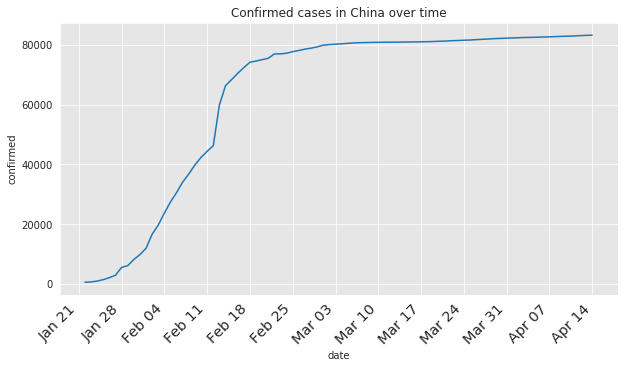

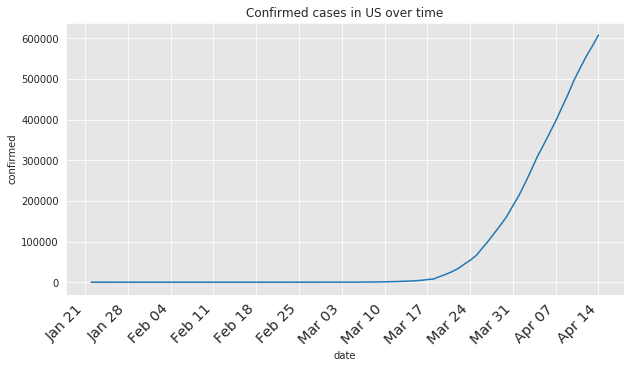

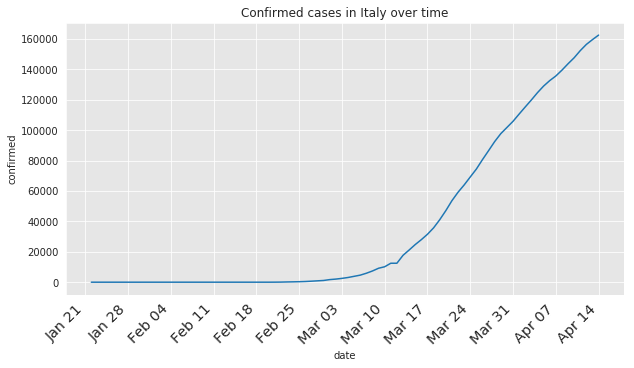

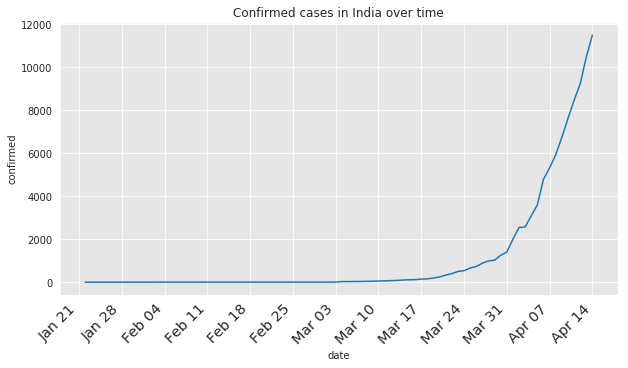

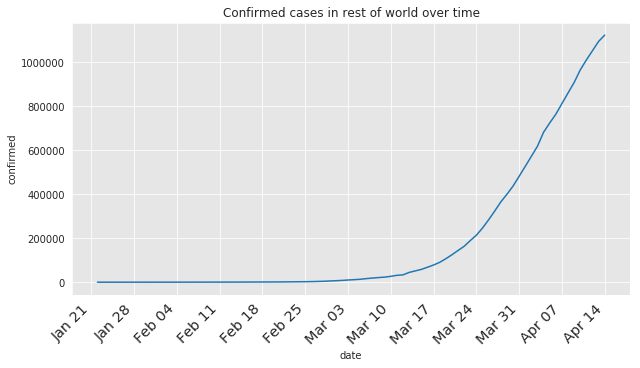

In [7]:
china_data = cleaned_data[cleaned_data['country'] == 'China'].reset_index()
grouped_china_data = china_data.groupby('date')['date', 'confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

us_data = cleaned_data[cleaned_data['country'] == 'US'].reset_index()
grouped_us_data = us_data.groupby('date')['date', 'confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

italy_data = cleaned_data[cleaned_data['country'] == 'Italy'].reset_index()
grouped_italy_data = italy_data.groupby('date')['date', 'confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

india_data = cleaned_data[cleaned_data['country'] == 'India']
grouped_india_data = india_data.groupby('date')['date', 'confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

rest = cleaned_data[~cleaned_data['country'].isin(['China', 'Italy', 'US'])].reset_index()
grouped_rest_data = rest.groupby('date')['date', 'confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

plot_graph(grouped_china_data, "Confirmed cases in China over time")
plot_graph(grouped_us_data, "Confirmed cases in US over time")
plot_graph(grouped_italy_data, "Confirmed cases in Italy over time")
plot_graph(grouped_india_data, "Confirmed cases in India over time")
plot_graph(grouped_rest_data, "Confirmed cases in rest of world over time")

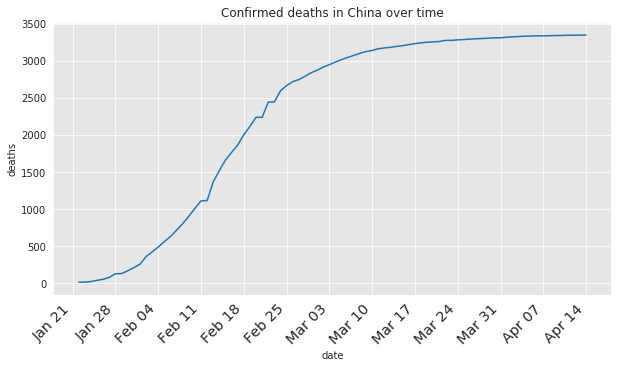

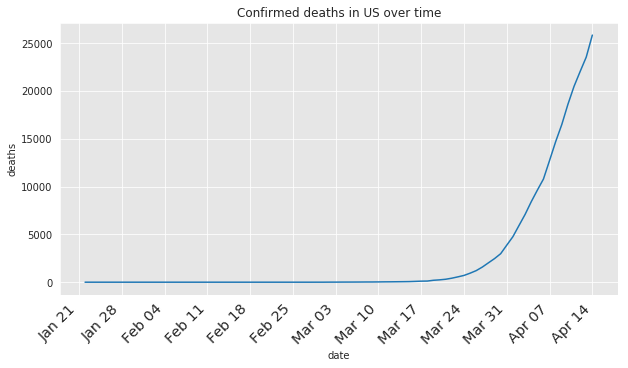

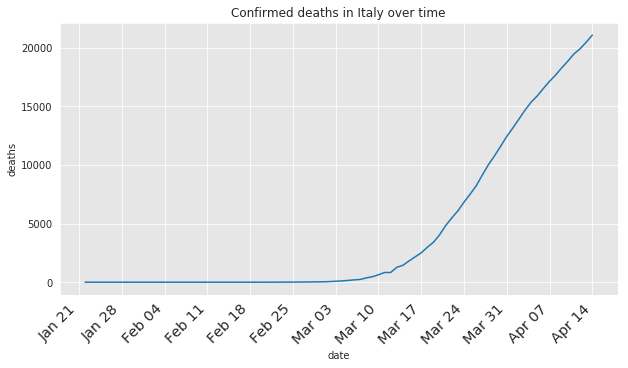

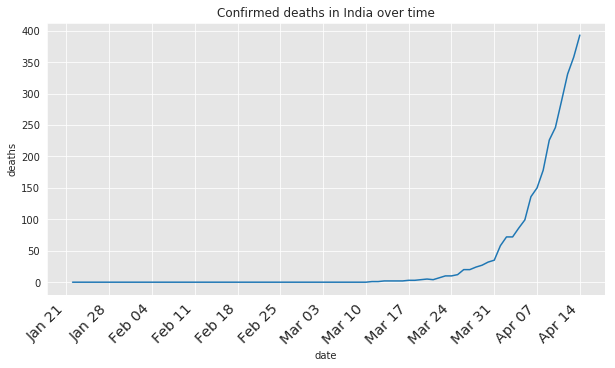

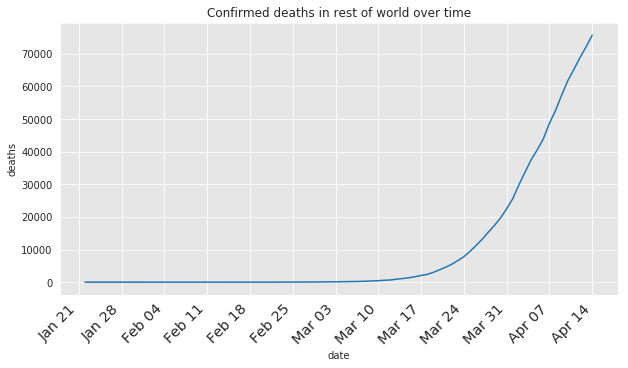

In [8]:
plot_graph(grouped_china_data, "Confirmed deaths in China over time", 'deaths')
plot_graph(grouped_us_data, "Confirmed deaths in US over time", 'deaths')
plot_graph(grouped_italy_data, "Confirmed deaths in Italy over time", 'deaths')
plot_graph(grouped_india_data, "Confirmed deaths in India over time", 'deaths')
plot_graph(grouped_rest_data, "Confirmed deaths in rest of world over time", 'deaths')

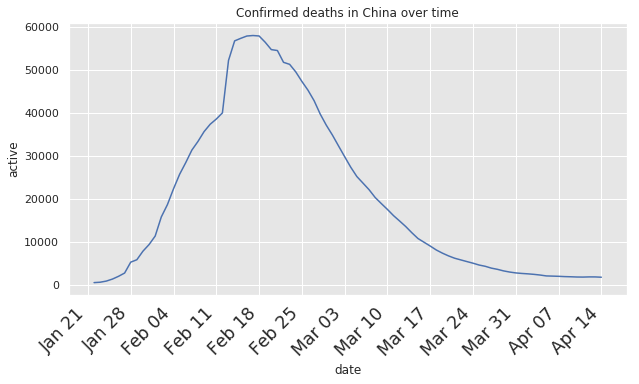

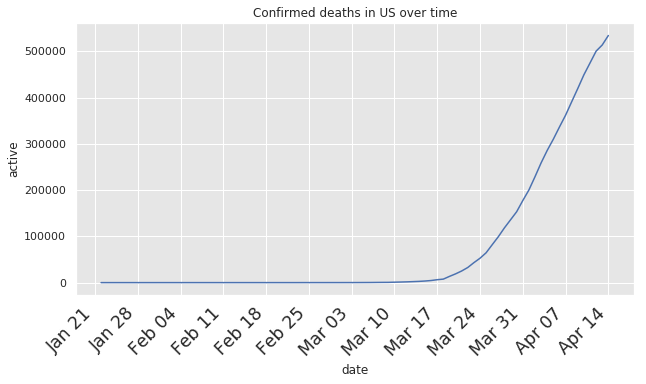

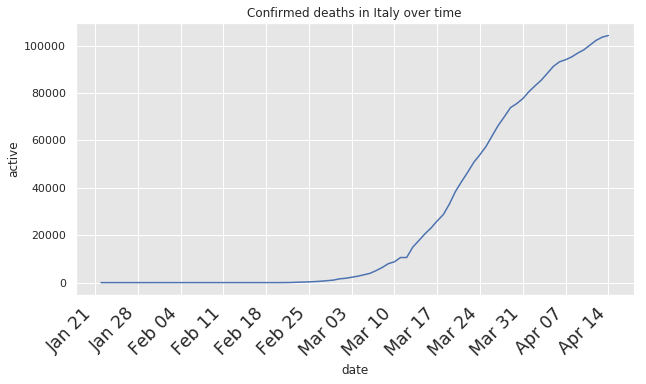

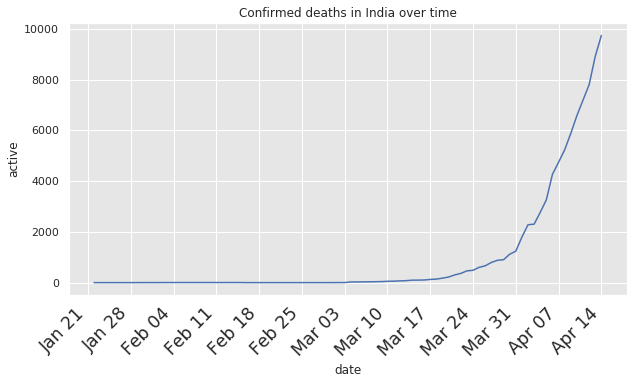

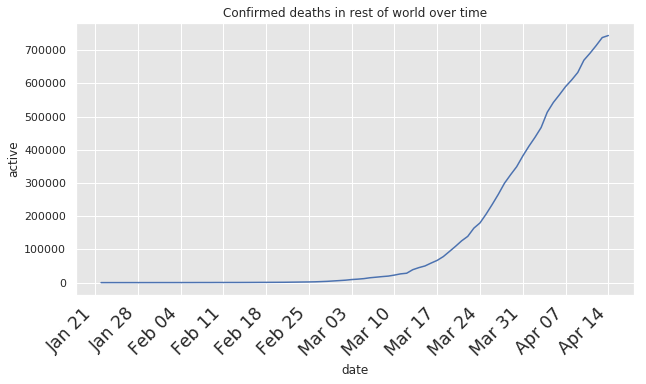

In [188]:
plot_graph(grouped_china_data, "Confirmed deaths in China over time", 'active')
plot_graph(grouped_us_data, "Confirmed deaths in US over time", 'active')
plot_graph(grouped_italy_data, "Confirmed deaths in Italy over time", 'active')
plot_graph(grouped_india_data, "Confirmed deaths in India over time", 'active')
plot_graph(grouped_rest_data, "Confirmed deaths in rest of world over time", 'active')

In [36]:
data = cleaned_data.groupby(['country'], sort=False)['confirmed', 'deaths', 'recovered'].max().reset_index()
data = data[data['confirmed'] > 100]
data['deaths per 100'] = round((data['deaths']/data['confirmed'])*100, 2)
data['recovered per 100'] = round((data['recovered']/data['confirmed'])*100, 2)
data.sort_values("recovered per 100", axis = 0, ascending = True)[:20].style.background_gradient(cmap='Greens')

,country,confirmed,deaths,recovered,deaths per 100,recovered per 100
172,Mali,144,13,0,9.03,0
28,Canada,14248,435,0,3.05,0
75,Ireland,11479,406,25,3.54,0.22
131,Serbia,4465,94,15,2.11,0.34
154,United Kingdom,93873,12107,344,12.9,0.37
112,Norway,6623,139,32,2.1,0.48
106,Netherlands,27419,2945,250,10.74,0.91
19,Bolivia,354,28,6,7.91,1.69
68,Honduras,407,26,7,6.39,1.72
115,Panama,3472,94,61,2.71,1.76


/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


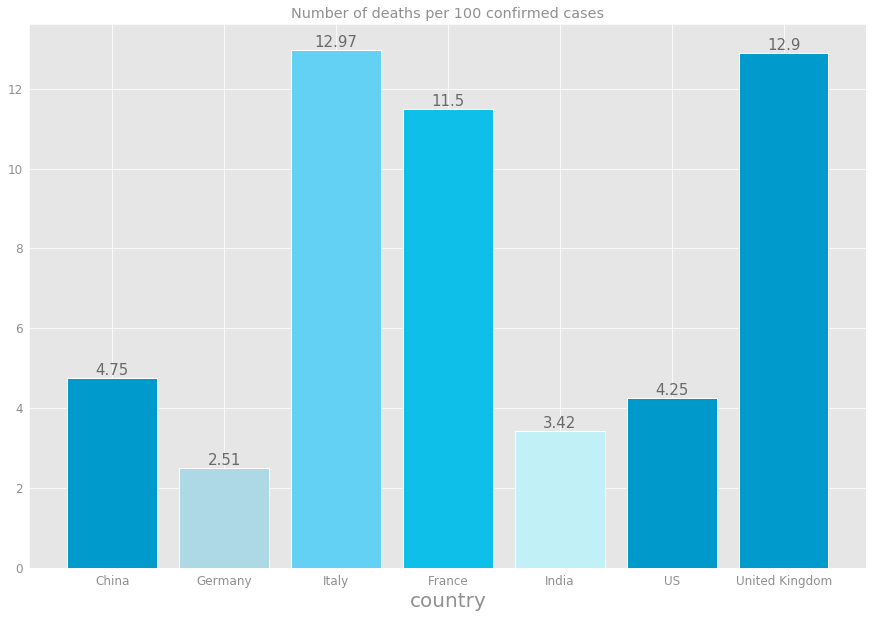

In [38]:
data_1 = data[data['country'].isin(['China', 'US', 'India', 'Italy', 'United Kingdom', 'France', 'Germany'])]
data_1['deaths per 100'] = round((data_1['deaths']/data_1['confirmed'])*100, 2)
data.sort_values("deaths per 100", axis = 0, ascending = False,inplace = True)
bar = Bar((15,10))
bar.x_coords = data_1['country']
bar.bar_heights = data_1['deaths per 100']
bar.title = 'Number of deaths per 100 confirmed cases'
bar.xlabel = "country"
bar.xlabel_attrs = {'fontsize': 20}
bar.show()

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


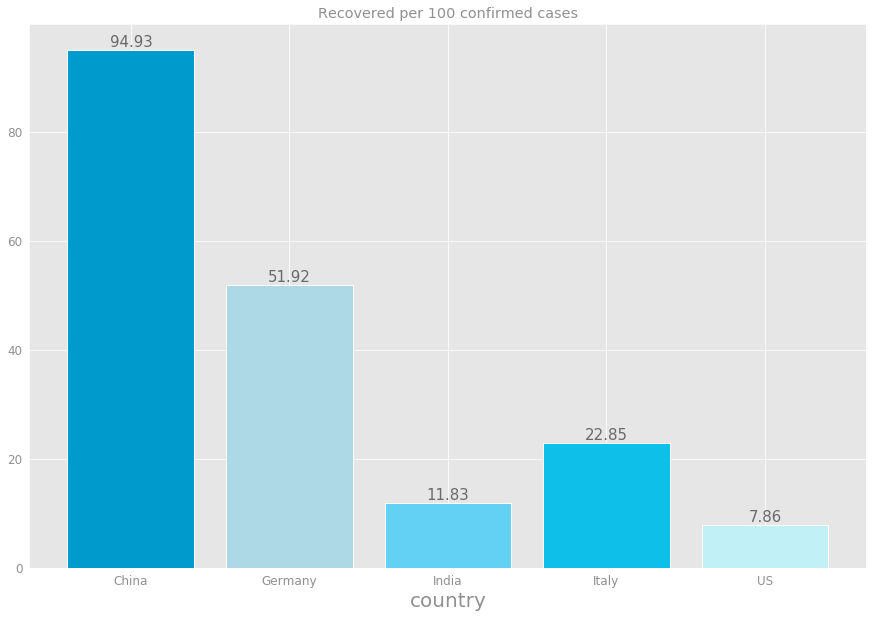

In [37]:
data_1 = data[data['country'].isin(['India', 'US', 'Italy', 'Germany', 'China'])]
data_1['recovered per 100'] = round((data_1['recovered']/data_1['confirmed'])*100, 2)
data.sort_values("recovered per 100", axis = 0, ascending = False,inplace = True)
bar = Bar((15,10))
bar.x_coords = data_1['country'][:10]
bar.bar_heights = data_1['recovered per 100'][:10]
bar.title = 'Recovered per 100 confirmed cases'
bar.xlabel = "country"
bar.xlabel_attrs = {'fontsize': 20}
bar.show()